**About the Data:**

The dataset consisting all the basic details of bank details of the customers, and the dataset has variables like categorical, and numerical. It has missing values and more anomalies. It consisting the customer's bank details and processional details over the years so we can explore more of it.  You have given the two data sets namely Train and Test datasets. Kindly use the TRAIN dataset to build and test the model. And use the Test dataset to submit your results.

SUBMISSION INSTRUCTIONS:
Predict the labels for the test dataset. And combine the same with ID.
Save it as a data frame.
And Upload the same predicted file with the solution file in a zip folder.
Do not drop any rows, The number of rows should be matched with the sample output that has attached below.

**Attributes:**

ID - Represents a unique identification of an entry.

CUSTOMER ID - Represents the unique identification of a person.

MONTH - Represents the month of the year.

NAME - Represents the name of a person.

AGE - Represents the age of the person.

SSN - Represents the social security number of the person.

OCCUPATION - Represents the occupation of the person.

ANNUAL INCOME - Represents the yearly income of the person.

MONTHLY IN-HAND SALARY - Represents the monthly base salary of a person.

NUM BANK ACCOUNTS - Represents the number of bank accounts a person holds.

NUM CREDIT CARD - Represents the number of other credit cards held by the person.

INTEREST Rate - Represents the interest rate on a credit card.

NUM OF LOAN - Represents the number of loans taken from the bank.

TYPE OF LOAN - Represents the type of loan taken by the person.

DELAY FROM DUE DATE - Represents the average number of days delayed from the payment date.

NUM OF DELAYED PAYMENT - Represents the average number of payments delayed by a person.

CHANGED CREDIT LIMIT - Represents the percentage change in credit card limit.

NUM CREDIT INQUIRIES - Represents the number of credit card inquiries.

CREDIT MIX - Represents the classification of the mix of credits.

OUTSTANDING DEBT - Represents the remaining debt to be paid(in USD).

CREDIT UTILIZATION RATIO - Represents the utilization ratio of the credit cards.

CREDIT HISTORY AGE - Represents the age of credit history of the person.

PAYMENT OF MIN AMOUNT - Represents whether only the minimum amount was paid by the person.

TOTAL EMI PER MONTH - Represents the monthly EMI payments(in USD).




**Section A:							Title: Classification model**


**Problem Statement:**

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce manual efforts.

**Objective:** 

The objective of this project is to explore the data to identify the pattern that causes the person to become a good or bad or standard type credit score and build a machine learning model that should be able to predict or classify the credit score type.


## Importing the libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from scipy import stats as st
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score,train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.feature_selection import RFE

## setup:

In [ ]:
pd.options.display.max_columns = 30
filterwarnings('ignore')
pd.set_option("display.max_rows", 100)
pd.set_option("display.precision", 8)
pd.options.display.float_format = '${:,.2f}'.format
plt.rcParams['figure.figsize']=[10,8]
plt.style.use('ggplot')

## Load the train and test data:

In [ ]:
## Reading the train data set using pandas library
train = pd.read_csv('train.csv',low_memory=False)
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"$1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,$4.00,_,809.98,$26.82,22 Years and 1 Months,No,$49.57,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,$4.00,Good,809.98,$31.94,NaN,No,$49.57,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,$4.00,Good,809.98,$28.61,22 Years and 3 Months,No,$49.57,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,$4.00,Good,809.98,$31.38,22 Years and 4 Months,No,$49.57,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"$1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,$4.00,Good,809.98,$24.80,22 Years and 5 Months,No,$49.57,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
# Reading the testing data set
test = pd.read_csv('test.csv')
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,"$1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,"$2,022.00",Good,809.98,$35.03,22 Years and 9 Months,No,$49.57,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,"$1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,$4.00,Good,809.98,$33.05,22 Years and 10 Months,No,$49.57,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,"$1,824.84",3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,$4.00,Good,809.98,$33.81,NaN,No,$49.57,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,$4.00,Good,809.98,$32.43,23 Years and 0 Months,No,$49.57,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,"$3,037.99",2,4,6,1,Credit-Builder Loan,3,1,5.42,$5.00,Good,605.03,$25.93,27 Years and 3 Months,No,$18.82,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


## Shape for the train data:

In [ ]:
train.shape

(100000, 28)

## Shape for the test data:

In [ ]:
test.shape

(50000, 27)

## Info for train data:

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## Info for test data:

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

### As we see from the above results that some of the features have been wrongly identified due to some anomalies in the data.

**Let's change the data types**

**Before changing the data types, Let's combine the datasets**

In [ ]:
df = pd.concat([train,test],axis =0,ignore_index=True,sort=False)

#### Let's see the shape of the combined dataset

In [ ]:
df.shape

(150000, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

### We can see that the features like Age, Annual_Income, Nun_of_loan, etc have been identified as object types due to anomalies in them.

#### Now let's clean and change the data types

**Let's display the two 2 rows of categorical variables**

In [ ]:
df.select_dtypes('object').head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [ ]:
def convert_function(data):
    x = ''
    for i in data:
        if i.isnumeric():
            x = x+i
    return x

In [ ]:
df['Age'] = df['Age'].apply(convert_function).astype('int')

In [ ]:
df['SSN']

0         821-00-0265
1         821-00-0265
2         821-00-0265
3         821-00-0265
4         821-00-0265
             ...     
149995    031-35-0942
149996    078-73-5990
149997    078-73-5990
149998    078-73-5990
149999    078-73-5990
Name: SSN, Length: 150000, dtype: object

In [ ]:
df['Annual_Income'] = df['Annual_Income'].str.strip('_').astype('float')

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(convert_function)

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype('int')

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.strip('_').astype('float')

In [ ]:
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.apply(lambda x: np.nan if x == '_' else x).astype('float')

In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].apply(lambda x: np.nan if x == '_' else x)

In [ ]:
df['Outstanding_Debt'] =  df['Outstanding_Debt'].str.strip('_').astype('float')

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.strip('_').astype('float')

In [ ]:
df['Monthly_Balance'] =  df['Monthly_Balance'].str.strip('_').astype('float')

### As of now we just changed the data type but we have noticed some unnatural range of values in age and Monthly balance feature, We will handle them in the upcoming steps.

#### Let's check the data types again

In [ ]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int32
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

### As we can see that the data types results, the variables' data types have been changed into their domain types.

### Credit_History_Age

In [ ]:
df.Credit_History_Age.head(3)

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
Name: Credit_History_Age, dtype: object

### Let's Describe the data

**For Numeric variables**

In [ ]:
df.describe(include='number')

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,"$150,000.00","$150,000.00","$127,500.00","$150,000.00","$150,000.00","$150,000.00","$150,000.00","$150,000.00","$139,500.00","$146,850.00","$147,000.00","$150,000.00","$150,000.00","$150,000.00","$143,250.00","$148,238.00"
mean,$119.34,"$173,055.20","$4,190.12",$17.01,$22.62,$71.23,$10.94,$21.06,$30.91,$10.38,$28.53,"$1,426.22",$32.28,"$1,432.51",$638.83,"$-33,729,543,032,150,998,122,496.00"
std,$682.55,"$1,404,214.60","$3,180.49",$117.07,$129.14,$461.54,$63.05,$14.86,$224.53,$6.79,$194.46,"$1,155.13",$5.11,"$8,403.76","$2,046.84","$3,352,926,955,205,306,764,754,944.00"
min,$14.00,"$7,005.93",$303.65,$-1.00,$0.00,$1.00,$0.00,$-5.00,$-3.00,$-6.49,$0.00,$0.23,$20.00,$0.00,$0.00,"$-333,333,333,333,333,314,856,026,112.00"
25%,$25.00,"$19,455.49","$1,625.27",$3.00,$4.00,$8.00,$2.00,$10.00,$9.00,$5.33,$3.00,$566.07,$28.05,$30.95,$74.53,$270.23
50%,$34.00,"$37,578.61","$3,091.00",$6.00,$5.00,$13.00,$3.00,$18.00,$14.00,$9.41,$6.00,"$1,166.15",$32.30,$71.28,$135.79,$336.80
75%,$43.00,"$72,796.90","$5,948.45",$7.00,$7.00,$20.00,$6.00,$28.00,$18.00,$14.84,$9.00,"$1,945.96",$36.49,$166.28,$266.11,$470.46
max,"$8,698.00","$24,198,062.00","$15,204.63","$1,798.00","$1,499.00","$5,799.00","$1,496.00",$67.00,"$4,399.00",$36.97,"$2,597.00","$4,998.07",$50.00,"$82,398.00","$10,000.00","$1,606.52"


### As we can see the basic statistic values for the Age feature, The mean value is 119, the std value is 682, the Median value is 34 and the max value is 8698. This concludes that the Age feature has anomalies and we can not tolerate that, Therefore we will be treating the anomalies in the coming steps.

### Also, we can see that the Annual Income feature has a high difference between the mean and median, This indicates that the data is not normal.

### The minimum value of the num_BANK_Account feature is a negative value, again this not be possible. Similarly, the Delay_from_due_date, Num_of_Delayed_Payment, and Changed_Credit_Limit also contain negative values.

..

**For categorical variables**

In [ ]:
df.describe(include='object')

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,150000,150000,150000,135000,150000,150000,132888,120000,136500,150000,150000,100000
unique,150000,12500,12,10139,12501,16,6260,3,408,3,7,3
top,0x1602,CUS_0xd40,January,Stevex,#F%$D@*&8,_______,Not Specified,Standard,17 Years and 11 Months,Yes,Low_spent_Small_value_payments,Standard
freq,1,12,12500,66,8400,10500,2112,54858,628,78484,38207,53174


### As we can see from the above analysis, the SSN and Occupation have some redundant values, Let's treat them in the best way possible.

..........

### One way of handling the redundant value is to replace them with the mode but in this case, if we could notice that each type of customer has their own Occupation(designation) therefore we can not replace them with one single parameter rather we can replace them with the mode of each customer.

#### Let's find each person occupation

In [ ]:
cust_id=df.groupby('Customer_ID')['Occupation'].agg(lambda x: x.value_counts().index[0]).index
cust_mode=df.groupby('Customer_ID')['Occupation'].agg(lambda x: x.value_counts().index[0]).values

In [ ]:
mapping = {i:j for i,j in zip(cust_id,cust_mode)}

In [ ]:
df['Occupation'] = df['Customer_ID'].map(mapping)

In [ ]:
df['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect',
       '_______'], dtype=object)

#### As we can see that still some _______ redundant value is present. Let's check the reason behind it.

In [ ]:
df[df['Occupation'] == '_______']['Customer_ID']

93280     CUS_0x9e67
93281     CUS_0x9e67
93282     CUS_0x9e67
93283     CUS_0x9e67
93284     CUS_0x9e67
93285     CUS_0x9e67
93286     CUS_0x9e67
93287     CUS_0x9e67
146640    CUS_0x9e67
146641    CUS_0x9e67
146642    CUS_0x9e67
146643    CUS_0x9e67
Name: Customer_ID, dtype: object

In [ ]:
df[df['Customer_ID']=='CUS_0x9e67']['Occupation']

93280     _______
93281     _______
93282     _______
93283     _______
93284     _______
93285     _______
93286     _______
93287     _______
146640    _______
146641    _______
146642    _______
146643    _______
Name: Occupation, dtype: object

#### As we can see from the above results one type of customer Occupation itself _______. therefore we can replace them with overall data mode or we can just replace that as Unkown.

In [ ]:
df['Occupation'] = df['Occupation'].replace({'_______':'Unkown'})

#### As the Each customer ID has unique SSN number we can replace this #F%$D@*&8 value with their mode value

In [ ]:
cust_id_ssn = df.groupby('Customer_ID')['SSN'].agg(lambda x: x.value_counts().index[0]).index
cust_mode_ssn = df.groupby('Customer_ID')['SSN'].agg(lambda x: x.value_counts().index[0]).values

In [ ]:
mapping2 = {i:j for i,j in zip(cust_id_ssn,cust_mode_ssn)}

In [ ]:
df['SSN'] = df['Customer_ID'].map(mapping2).nunique()

In [ ]:
df[df['SSN'] == "#F%$D@*&8"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


#### Payment_Behaviour

In [ ]:
df.Payment_Behaviour

0          High_spent_Small_value_payments
1           Low_spent_Large_value_payments
2          Low_spent_Medium_value_payments
3           Low_spent_Small_value_payments
4         High_spent_Medium_value_payments
                        ...               
149995      Low_spent_Small_value_payments
149996      Low_spent_Small_value_payments
149997      Low_spent_Large_value_payments
149998     High_spent_Small_value_payments
149999     Low_spent_Medium_value_payments
Name: Payment_Behaviour, Length: 150000, dtype: object

#### As we can see that the Payment Behaviour has some anomaly value namely!@9#%8, Therefore We will replace that values with the mode values of each customer.

In [ ]:
cust = df[df['Payment_Behaviour']=='!@9#%8']['Customer_ID'].unique()
cust_id = df[df['Customer_ID'].isin(cust)].groupby('Customer_ID')['Payment_Behaviour'].agg(lambda x: x.value_counts().index[0]).index
cust_value = df[df['Customer_ID'].isin(cust)].groupby('Customer_ID')['Payment_Behaviour'].agg(lambda x: x.value_counts().index[0]).values

In [ ]:
map1 = {i:j for i,j in zip(cust_id,cust_value)}
df['Payment_Behaviour'] = df[['Customer_ID','Payment_Behaviour']].apply(lambda x: map1[x[0]] if x[0] in map1.keys() else x[1],axis=1)

In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace({'!@9#%8':df.Payment_Behaviour.mode()[0]})

In [ ]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      54082
High_spent_Medium_value_payments    31275
High_spent_Large_value_payments     22869
Low_spent_Medium_value_payments     17600
High_spent_Small_value_payments     12742
Low_spent_Large_value_payments      11432
Name: Payment_Behaviour, dtype: int64

## Let's check the age feature:

<AxesSubplot:xlabel='Age', ylabel='Density'>

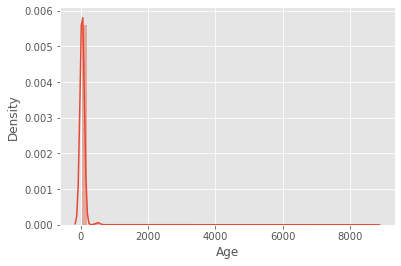

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(df['Age'])

#### We can see the distribution of the age feature, Some values are less than 0 and some values are greater than 100,200, etc. But this is impossible that humans live till 8000 years and less than 0 days. Thus we have to handle this otherwise whatever analysis that we make that end up becoming unfair.

#### Let's check how many rows above 100 and how many rows less than 20

In [ ]:
df[(df['Age']>100)|(df['Age']<0)].shape[0]

4177

#### Let's replace with median value.

In [ ]:
median_age = df['Age'].median()
df['Age'] = df['Age'].apply(lambda x: median_age if x>80 or x<20 else x)

#### Let's recheck the distribution (range) of the age feature

<AxesSubplot:xlabel='Age', ylabel='Density'>

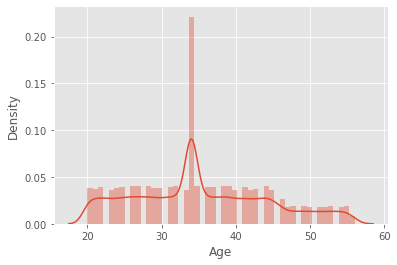

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(df['Age'])

#### we can see that the distribution has changed drastically. 

### Let's see the Annual Income feature

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

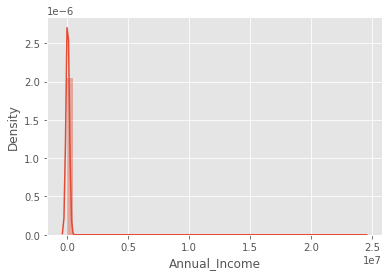

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(df['Annual_Income'])

In [ ]:
df['Annual_Income'].mean()

173055.2025310305

In [ ]:
df['Annual_Income'].std()

1404214.602712656

In [ ]:
df['Annual_Income'].median()

37578.61

In [ ]:
df['Annual_Income'].max()

24198062.0

In [ ]:
df['Annual_Income'].min()

7005.93

In [ ]:
Q1 = df['Annual_Income'].quantile(.25)
Q1

19455.49

In [ ]:
Q3 = df['Annual_Income'].quantile(.75)
Q3

72796.905

In [ ]:
IQR = Q3 - Q1
IQR

53341.41499999999

In [ ]:
Q1 - 1.5*IQR

-60556.63249999999

In [ ]:
Q3 + 1.5*IQR

152809.0275

#### As we can see that the Standard deviation is very high, and Q3 + 1.5*IQR value is 152809 and the maximum value is  24198062.0. This clearly shows that there is a high magnitude of values present in the Annual Income and it seems like this could be an anomaly because each customer's median values have a normal magnitude. Thus we will replace the values above 152809 with the customer's wise median.

In [ ]:
df[df['Annual_Income']>152809.0275]['Customer_ID'].nunique()

1624

#### As we can see that 1624 customer have above the 152809.0275 value, Let's replace Annual Income values for those who are above than our threshold value.

In [ ]:
cust = df[df['Annual_Income']>152809.0275]['Customer_ID'].unique()
cust

array(['CUS_0x284a', 'CUS_0xbffe', 'CUS_0x9a71', ..., 'CUS_0x41d3',
       'CUS_0x7a7d', 'CUS_0x90a1'], dtype=object)

In [ ]:
cust_id = df[df['Customer_ID'].isin(cust)].groupby('Customer_ID')['Annual_Income'].median().index
cust_value = df[df['Customer_ID'].isin(cust)].groupby('Customer_ID')['Annual_Income'].median().values

In [ ]:
for i,j in zip(cust_id,cust_value):
    df.loc[df.Customer_ID ==i,'Annual_Income'] = j

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

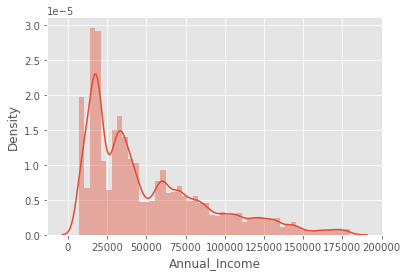

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(df['Annual_Income'])

### Let's check some of the features have negative values but as per the domain constraints, they should not have negative values.

#### Delay_from_due_date

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Density'>

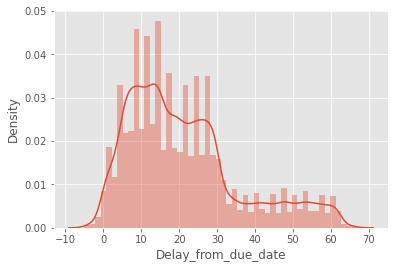

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(df['Delay_from_due_date'])

In [ ]:
df['Delay_from_due_date'].min()

-5

In [ ]:
df[df['Delay_from_due_date']<0].shape[0]

889

In [ ]:
df[df['Delay_from_due_date']<0]['Customer_ID'].nunique()

543

In [ ]:
cust = df[df['Delay_from_due_date']<0]['Customer_ID'].unique()
cust_id = df[df['Customer_ID'].isin(cust)].groupby('Customer_ID')['Delay_from_due_date'].median().index
cust_value = df[df['Customer_ID'].isin(cust)].groupby('Customer_ID')['Delay_from_due_date'].median().values

In [ ]:
for i,j in zip(cust_id,cust_value):
    if j > 0:
        df.loc[df.Customer_ID ==i,'Delay_from_due_date'] = j
    else:
        df.loc[df.Customer_ID ==i,'Delay_from_due_date'] = df[df['Customer_ID'] == i].groupby('Customer_ID')['Delay_from_due_date'].max()

In [ ]:
df[df['Delay_from_due_date']<0]['Customer_ID'].unique()

array([], dtype=object)

#### As we can see that there are no values that are less than 0.

#### As we can see that the feature has 889 values are negative. Out of 889 values, 543 are unique customers so it clearly shows that we can replace them with the customer median value ofDelay_from_due_date. 

##### Num_of_Delayed_Payment

In [ ]:
cust_id = df[df['Num_of_Delayed_Payment']<0]['Customer_ID'].unique()

In [ ]:
cust_id = df[df['Customer_ID'].isin(cust_id)].groupby('Customer_ID')['Num_of_Delayed_Payment'].median().index
values = df[df['Customer_ID'].isin(cust_id)].groupby('Customer_ID')['Num_of_Delayed_Payment'].median().values

In [ ]:
map1 = {i:j for i,j in zip(cust_id,values)}

In [ ]:
df['Num_of_Delayed_Payment'] = df[['Customer_ID','Num_of_Delayed_Payment']].apply(lambda x: map1[x[0]] if x[0] in map1 and x[1]<0 and map1[x[0]]>0 else df[df.Customer_ID == x[0]]['Num_of_Delayed_Payment'].max() if x[0] in map1.keys() and map1[x[0]] <0 else x[1],axis=1)

#### As we can see in the code we have replaced the negative value of the customer with the customer median value.

In [ ]:
cust_id = df[df['Changed_Credit_Limit']<0]['Customer_ID'].unique()

In [ ]:
cust_id = df[df['Customer_ID'].isin(cust_id)].groupby('Customer_ID')['Changed_Credit_Limit'].median().index
values = df[df['Customer_ID'].isin(cust_id)].groupby('Customer_ID')['Changed_Credit_Limit'].median().values
map1 = {i:j for i,j in zip(cust_id,values)}

In [ ]:
df['Changed_Credit_Limit'] = df[['Customer_ID','Changed_Credit_Limit']].apply(lambda x: map1[x[0]] if x[0] in map1 and x[1]<0 and map1[x[0]]>0 else df[df.Customer_ID == x[0]]['Changed_Credit_Limit'].max() if x[0] in map1.keys() and map1[x[0]] <0 else x[1],axis=1)

In [ ]:
df[df['Changed_Credit_Limit']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## Missing value 

In [ ]:
missing = pd.DataFrame([df.isnull().sum(),df.isnull().sum()/len(df)*100]).T
missing.columns = ['missing count','missing percentage']
missing[missing['missing count']>0]

,missing count,missing percentage
Name,"$15,000.00",$10.00
Monthly_Inhand_Salary,"$22,500.00",$15.00
Type_of_Loan,"$17,112.00",$11.41
Delay_from_due_date,"$1,752.00",$1.17
Num_of_Delayed_Payment,"$10,500.00",$7.00
Changed_Credit_Limit,"$3,150.00",$2.10
Num_Credit_Inquiries,"$3,000.00",$2.00
Credit_Mix,"$30,000.00",$20.00
Credit_History_Age,"$13,500.00",$9.00
Amount_invested_monthly,"$6,750.00",$4.50


In [ ]:
import missingno as msno

<AxesSubplot:>

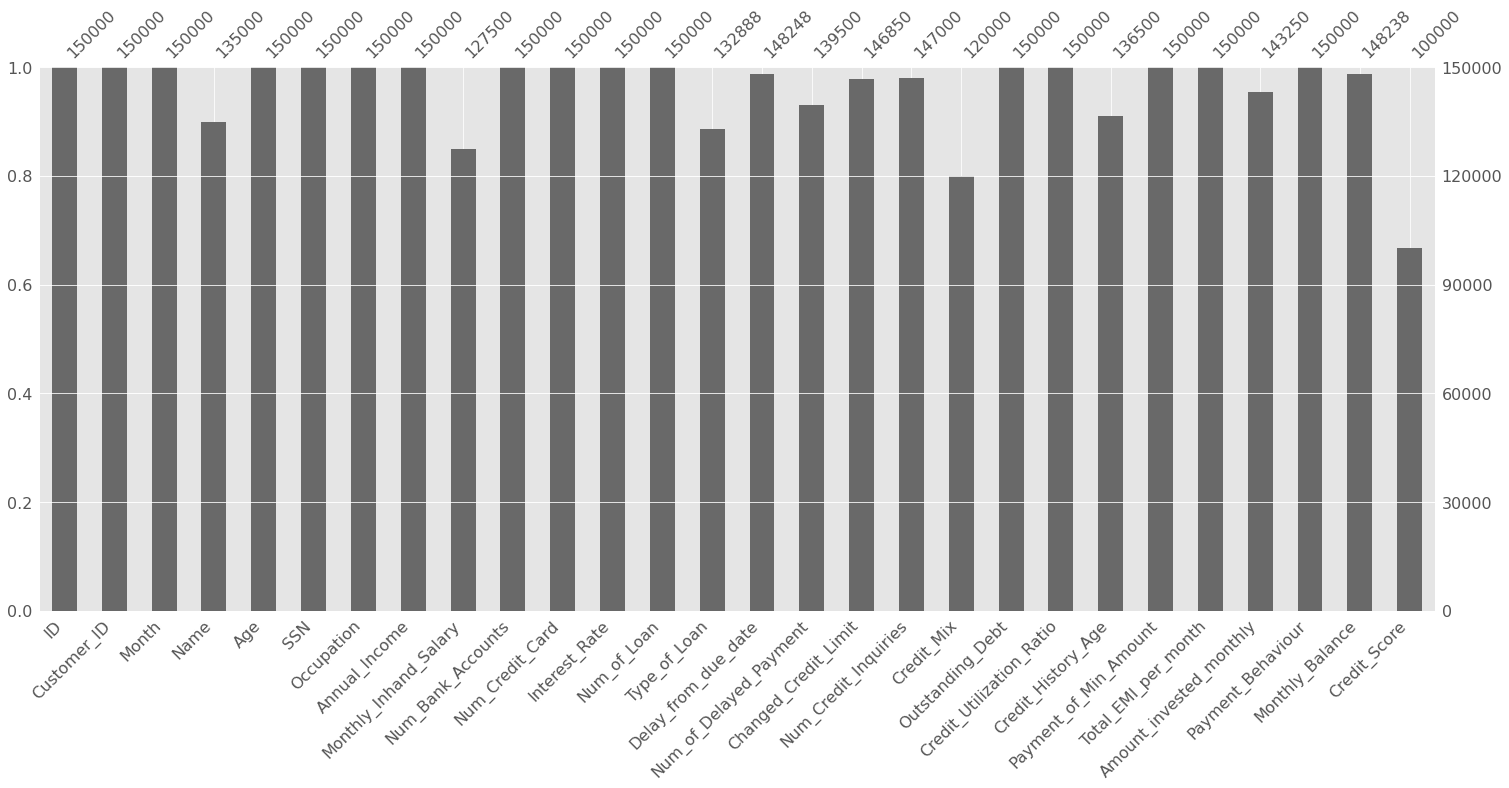

In [ ]:
msno.bar(df)

<AxesSubplot:>

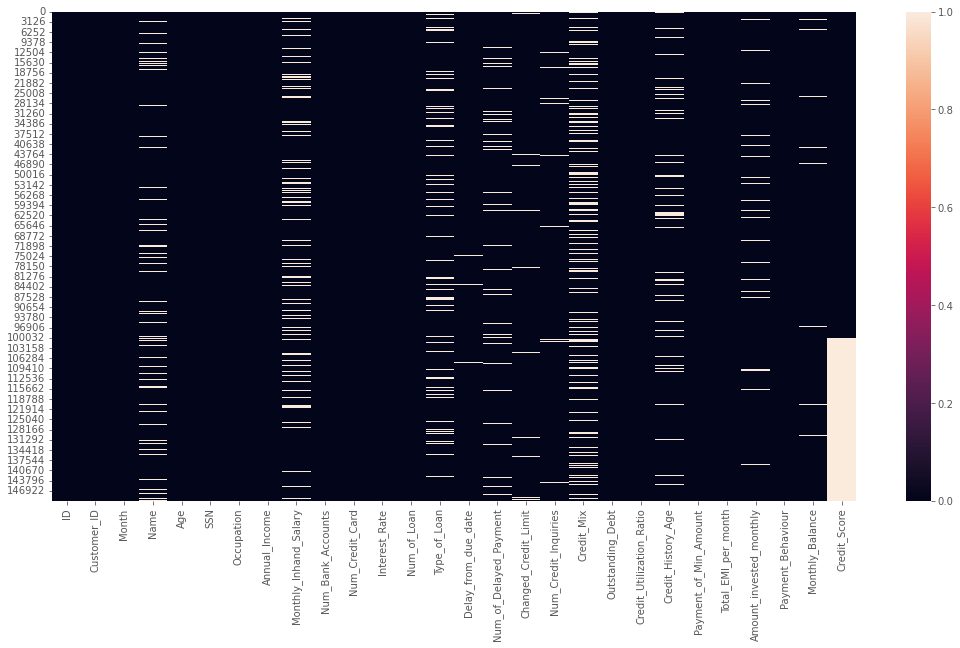

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(df.isnull())

## Check for the duplicates:

In [ ]:
df[df.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [ ]:
print("Skewness")
print(df.skew())
print()
print()
print('Kurtosis')
df.kurt()

Skewness
Age                          $0.31
SSN                          $0.00
Annual_Income                $1.13
Monthly_Inhand_Salary        $1.13
Num_Bank_Accounts           $11.22
Num_Credit_Card              $8.40
Interest_Rate                $9.12
Num_of_Loan                 $16.35
Delay_from_due_date          $0.99
Num_of_Delayed_Payment      $14.34
Changed_Credit_Limit         $0.73
Num_Credit_Inquiries         $9.72
Outstanding_Debt             $1.21
Credit_Utilization_Ratio     $0.03
Total_EMI_per_month          $7.05
Amount_invested_monthly      $4.31
Monthly_Balance            $-99.40
dtype: float64


Kurtosis


Age                           $-0.60
SSN                            $0.00
Annual_Income                  $0.61
Monthly_Inhand_Salary          $0.62
Num_Bank_Accounts            $132.65
Num_Credit_Card               $73.65
Interest_Rate                 $87.49
Num_of_Loan                  $307.22
Delay_from_due_date            $0.35
Num_of_Delayed_Payment       $218.52
Changed_Credit_Limit           $0.10
Num_Credit_Inquiries          $99.14
Outstanding_Debt               $0.90
Credit_Utilization_Ratio      $-0.95
Total_EMI_per_month           $51.40
Amount_invested_monthly       $16.80
Monthly_Balance            $9,877.87
dtype: float64

### Missing values imputation

#### Missing values Imputation for categorical variable

In [ ]:
df.select_dtypes('object').isnull().sum()

ID                           0
Customer_ID                  0
Month                        0
Name                     15000
Occupation                   0
Type_of_Loan             17112
Credit_Mix               30000
Credit_History_Age       13500
Payment_of_Min_Amount        0
Payment_Behaviour            0
Credit_Score             50000
dtype: int64

In [ ]:
df[['Customer_ID','Name']]

,Customer_ID,Name
0,CUS_0xd40,Aaron Maashoh
1,CUS_0xd40,Aaron Maashoh
2,CUS_0xd40,Aaron Maashoh
3,CUS_0xd40,Aaron Maashoh
4,CUS_0xd40,Aaron Maashoh
...,...,...
149995,CUS_0x8600,Sarah McBridec
149996,CUS_0x942c,Nicks
149997,CUS_0x942c,Nicks
149998,CUS_0x942c,Nicks


#### As we can see that each customer ID has its Customer Name, SO we can not fill the missing value with one value. Thus We will take the mode value for each customer ID and replace the missing value with the mode of each customer ID.

In [ ]:
customer_ID = df[df['Name'].isnull()]['Customer_ID'].unique()
customer_ID

array(['CUS_0xd40', 'CUS_0x2dbc', 'CUS_0x4157', ..., 'CUS_0x64f0',
       'CUS_0x2c0a', 'CUS_0x3048'], dtype=object)

In [ ]:
ids = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Name'].agg(lambda x: x.value_counts().index[0]).index
names = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Name'].agg(lambda x: x.value_counts().index[0]).values

In [ ]:
mapping1 = {i:j for i,j in zip(ids,names)}

In [ ]:
df.Name = df[['Customer_ID','Name']].apply(lambda x: mapping1[x[0]] if x[0] in mapping1.keys() else x[1],axis=1)

In [ ]:
df.Name.isnull().sum()

0

#### Now as we can see that the null value counts is zero.

##### Type_of_Loan

In [ ]:
customer_ID = df[df.Type_of_Loan.isnull()]['Customer_ID'].unique()
df[df['Customer_ID'].isin(customer_ID)]['Type_of_Loan'].value_counts()

Series([], Name: Type_of_Loan, dtype: int64)

In [ ]:
df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Type_of_Loan'].agg(lambda x: x.value_counts())

Customer_ID
CUS_0x100b    []
CUS_0x1015    []
CUS_0x1044    []
CUS_0x105b    []
CUS_0x10a9    []
              ..
CUS_0xe4e     []
CUS_0xe94     []
CUS_0xf79     []
CUS_0xfb6     []
CUS_0xfe5     []
Name: Type_of_Loan, Length: 1426, dtype: object

#### As we can see that the above type customers have no type of loan defined, Therefore We will replace null values and [] values with Unkown word.

In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].replace({np.nan:'Unkown','[]':'Unkown'})

##### Credit_Mix

In [ ]:
customer_ID = df[df['Credit_Mix'].isnull()]['Customer_ID'].unique()
ids = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Credit_Mix'].agg(lambda x: x.value_counts().index[0]).index
Credit_Mix = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Credit_Mix'].agg(lambda x: x.value_counts().index[0]).values
mapping1 = {i:j for i,j in zip(ids,Credit_Mix)}
df.Credit_Mix = df[['Customer_ID','Credit_Mix']].apply(lambda x: mapping1[x[0]] if x[0] in mapping1.keys() else x[1],axis=1)

#### Payment_of_Min_Amount

In [ ]:
df.Payment_of_Min_Amount.value_counts()

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

##### As we can see that NM in the Payment_of_Min_Amount column, we can understand that is an anomaly and it must be replaced as No, Thus we will replace NM with NO.

In [ ]:
df.Payment_of_Min_Amount = df.Payment_of_Min_Amount.replace({"NM":'No'})

In [ ]:
df.Payment_of_Min_Amount.value_counts()

Yes    78484
No     71516
Name: Payment_of_Min_Amount, dtype: int64

#####  As we can see that the NM value has been changed to No.

##### Credit_History_Age

In [ ]:
df.Credit_History_Age
customer_ID = df[df['Credit_History_Age'].isnull()]['Customer_ID'].unique()
ids = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Credit_History_Age'].agg(lambda x: x.value_counts().index[0]).index
Credit_History_Age = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Credit_History_Age'].agg(lambda x: x.value_counts().index[0]).values
mapping1 = {i:j for i,j in zip(ids,Credit_History_Age)}
df.Credit_History_Age = df[['Customer_ID','Credit_History_Age']].apply(lambda x: mapping1[x[0]] if x[0] in mapping1.keys() else x[1],axis=1)

##### As we can see that the Credit History Age feature just has the year and months, So we can just extract the numerical values.

In [ ]:
def extract_num(data):
    data = str(data).split(' ')
    return float(str(data[0])+'.'+str(data[3]))

In [ ]:
df.Credit_History_Age = df.Credit_History_Age.apply(extract_num).astype('float')

##### Numerical variables

In [ ]:
df.select_dtypes('number').isnull().sum()

Age                             0
SSN                             0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date          1752
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Monthly_Balance              1762
dtype: int64

##### Monthly_Inhand_Salary

In [ ]:
df[['Monthly_Inhand_Salary','Customer_ID']].head(10)

,Monthly_Inhand_Salary,Customer_ID
0,"$1,824.84",CUS_0xd40
1,NaN,CUS_0xd40
2,NaN,CUS_0xd40
3,NaN,CUS_0xd40
4,"$1,824.84",CUS_0xd40
5,NaN,CUS_0xd40
6,"$1,824.84",CUS_0xd40
7,"$1,824.84",CUS_0xd40
8,"$3,037.99",CUS_0x21b1
9,"$3,037.99",CUS_0x21b1


#### As we can see Each customer has a different salary, Therefore we can impute the missing value with the median for each customer.

In [ ]:
customer_ID = df[df['Monthly_Inhand_Salary'].isnull()]['Customer_ID'].unique()
cust_id = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Monthly_Inhand_Salary'].median().index
values = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Monthly_Inhand_Salary'].median().values
mapping1 =  {i:j for i,j in zip(cust_id,values)}
df['Monthly_Inhand_Salary'] = df[['Customer_ID','Monthly_Inhand_Salary']].apply(lambda x: mapping1[x[0]] if x[0] in mapping1.keys() else x[1],axis=1)

##### Delay_from_due_date

In [ ]:
customer_ID = df[df['Delay_from_due_date'].isnull()]['Customer_ID'].unique()
cust_id = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Delay_from_due_date'].median().index
values = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Delay_from_due_date'].median().values
mapping1 =  {i:j for i,j in zip(cust_id,values)}
df['Delay_from_due_date'] = df[['Customer_ID','Delay_from_due_date']].apply(lambda x: mapping1[x[0]] if x[0] in mapping1.keys() else x[1],axis=1)

In [ ]:
customer_ID[:10]

array(['CUS_0x284a', 'CUS_0x230a', 'CUS_0x532d', 'CUS_0x8153',
       'CUS_0x666a', 'CUS_0x868f', 'CUS_0xbbf5', 'CUS_0x67dc',
       'CUS_0x3313', 'CUS_0x92fc'], dtype=object)

In [ ]:
df[df['Customer_ID'].isin(customer_ID)].shape

(1752, 28)

#### As we can see that the total customer records for the above customers id's and total missing value counts for Delay_from_due_date value are the same, That means that these customers had no values except missing values. Thus we will impute the missing value with the feature median value. 

In [ ]:
df.Delay_from_due_date = df.Delay_from_due_date.replace({np.nan:df.Delay_from_due_date.median()})

##### Num_of_Delayed_Payment

In [ ]:
customer_ID = df[df['Num_of_Delayed_Payment'].isnull()]['Customer_ID'].unique()
cust_id = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Num_of_Delayed_Payment'].median().index
values = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Num_of_Delayed_Payment'].median().values
mapping1 =  {i:j for i,j in zip(cust_id,values)}
df['Num_of_Delayed_Payment'] = df[['Customer_ID','Num_of_Delayed_Payment']].apply(lambda x: mapping1[x[0]] if x[0] in mapping1.keys() else x[1],axis=1)

##### Changed_Credit_Limit

In [ ]:
customer_ID = df[df['Changed_Credit_Limit'].isnull()]['Customer_ID'].unique()
cust_id = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Changed_Credit_Limit'].median().index
values = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Changed_Credit_Limit'].median().values
mapping1 =  {i:j for i,j in zip(cust_id,values)}
df['Changed_Credit_Limit'] = df[['Customer_ID','Changed_Credit_Limit']].apply(lambda x: mapping1[x[0]] if x[0] in mapping1.keys() else x[1],axis=1)

##### Num_Credit_Inquiries

In [ ]:
customer_ID = df[df['Num_Credit_Inquiries'].isnull()]['Customer_ID'].unique()
cust_id = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Num_Credit_Inquiries'].median().index
values = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Num_Credit_Inquiries'].median().values
mapping1 =  {i:j for i,j in zip(cust_id,values)}
df['Num_Credit_Inquiries'] = df[['Customer_ID','Num_Credit_Inquiries']].apply(lambda x: mapping1[x[0]] if x[0] in mapping1.keys() else x[1],axis=1)

##### Amount_invested_monthly

In [ ]:
customer_ID = df[df['Amount_invested_monthly'].isnull()]['Customer_ID'].unique()
cust_id = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Amount_invested_monthly'].median().index
values = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Amount_invested_monthly'].median().values
mapping1 =  {i:j for i,j in zip(cust_id,values)}
df['Amount_invested_monthly'] = df[['Customer_ID','Amount_invested_monthly']].apply(lambda x: mapping1[x[0]] if x[0] in mapping1.keys() else x[1],axis=1)

##### Monthly_Balance

In [ ]:
customer_ID = df[df['Monthly_Balance'].isnull()]['Customer_ID'].unique()
cust_id = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Monthly_Balance'].median().index
values = df[df['Customer_ID'].isin(customer_ID)].groupby('Customer_ID')['Monthly_Balance'].median().values
mapping1 =  {i:j for i,j in zip(cust_id,values)}
df['Monthly_Balance'] = df[['Customer_ID','Monthly_Balance']].apply(lambda x: mapping1[x[0]] if x[0] in mapping1.keys() else x[1],axis=1)

## Analysis

### Let's check the distribution of the numerical features:

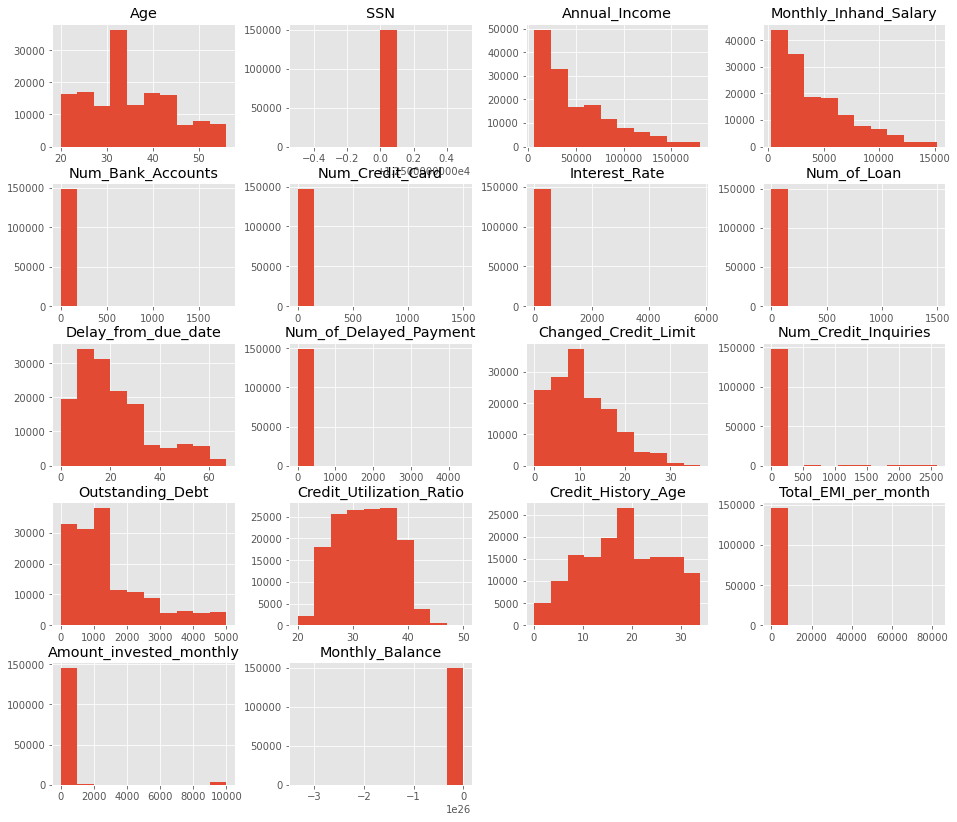

In [ ]:
plt.rcParams['figure.figsize']=[16,14]
df.hist()
plt.show()

### Let's see the distribution of the target variables:

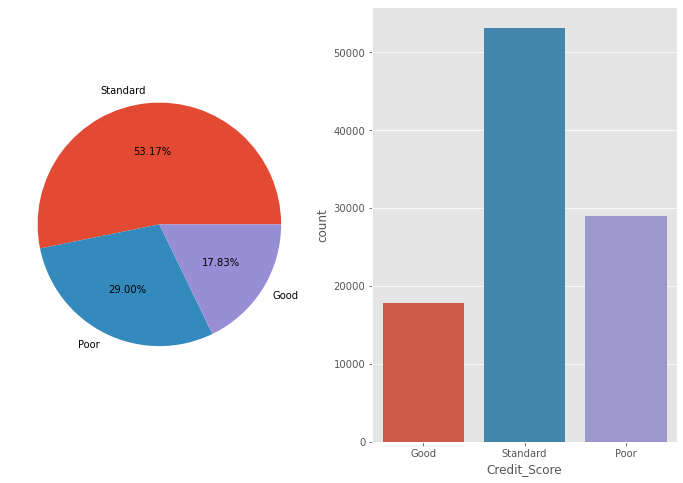

In [ ]:
plt.rcParams['figure.figsize']=[12,8]
index = df.Credit_Score.value_counts().index
values = df.Credit_Score.value_counts().values
plt.subplot(1,2,1)
plt.pie(values,labels=index,autopct='%.2f%%')
plt.subplot(1,2,2)
sns.countplot(df.Credit_Score)
plt.show()

#### As we can see from the distribution of the classes, the Standard class has a high distribution.

### Let's see the distribution of the occupation:

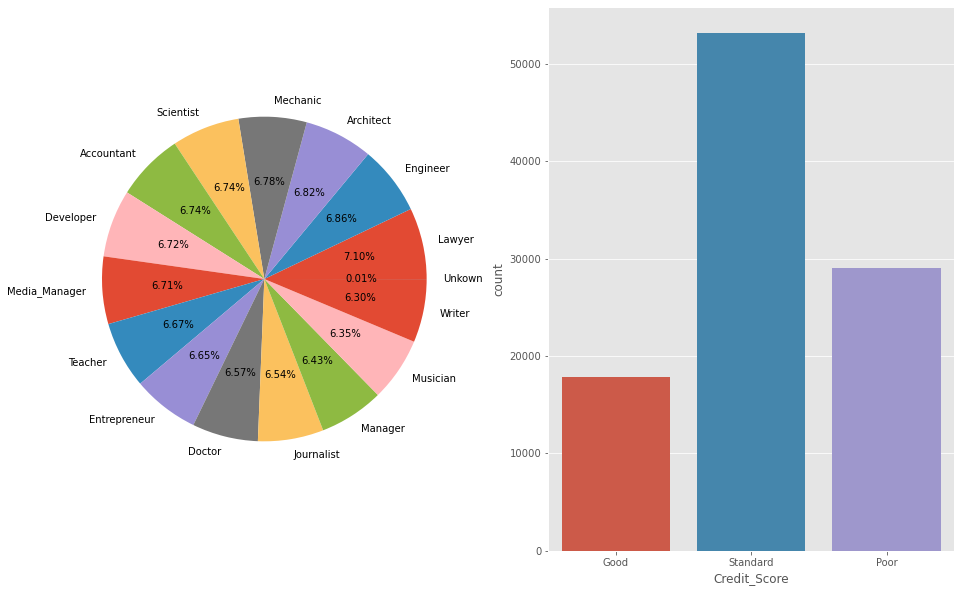

In [ ]:
plt.rcParams['figure.figsize']=[16,10]
index = df.Occupation.value_counts().index
values = df.Occupation.value_counts().values
plt.subplot(1,2,1)
plt.pie(values,labels=index,autopct='%.2f%%')
plt.subplot(1,2,2)
sns.countplot(df.Credit_Score)
plt.show()

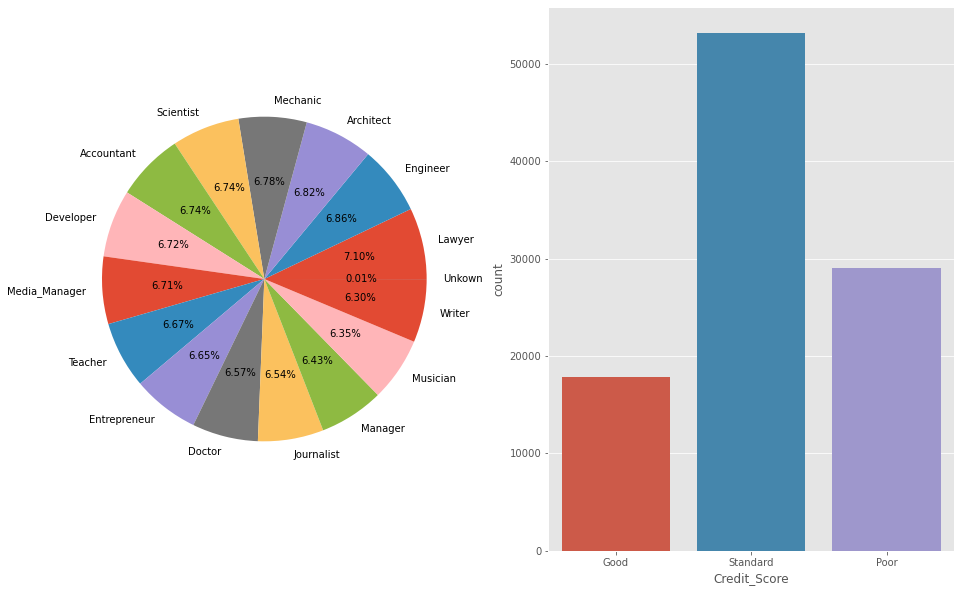

In [ ]:
plt.rcParams['figure.figsize']=[16,10]
index = df.Occupation.value_counts().index
values = df.Occupation.value_counts().values
plt.subplot(1,2,1)
plt.pie(values,labels=index,autopct='%.2f%%')
plt.subplot(1,2,2)
sns.countplot(df.Credit_Score)
plt.show()

#### Let's check the correaltion between the independent variables

### Pearson correlation 

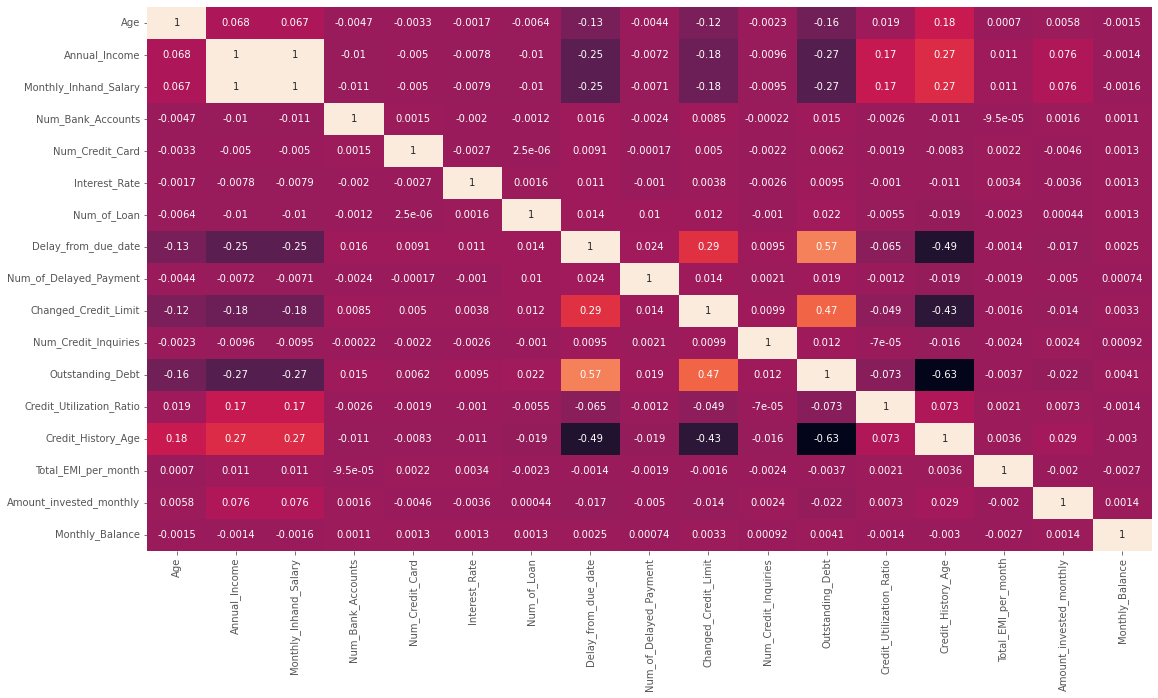

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.drop('SSN',axis=1).corr(method='pearson'),annot=True,cbar=False)
plt.show()

#### Spearman Correlation matric

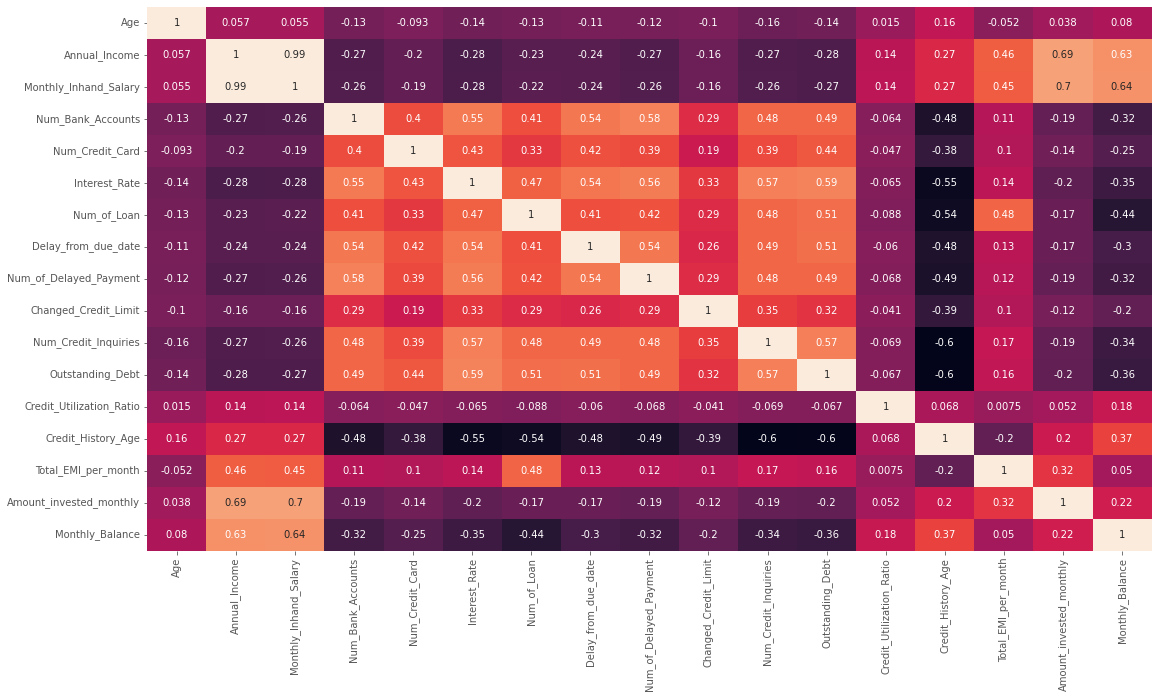

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.drop('SSN',axis=1).corr(method='spearman'),annot=True,cbar=False)
plt.show()

#### Since the majority of features are not normally distributed, we are considering the spearman correlation. As we can see some moderate possitive and negative multi-correlation among the features.

## Identify the factors that affect the target classes(labels)

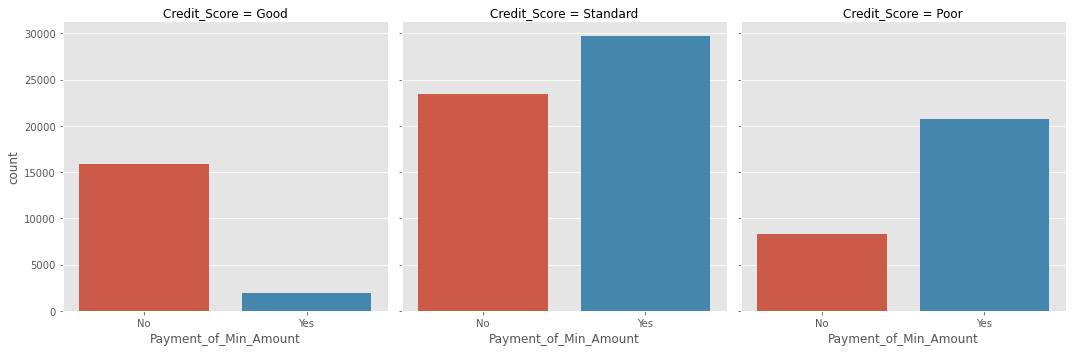

In [ ]:
sns.factorplot('Payment_of_Min_Amount', col = 'Credit_Score', data = df, kind = 'count', col_wrap = 3)

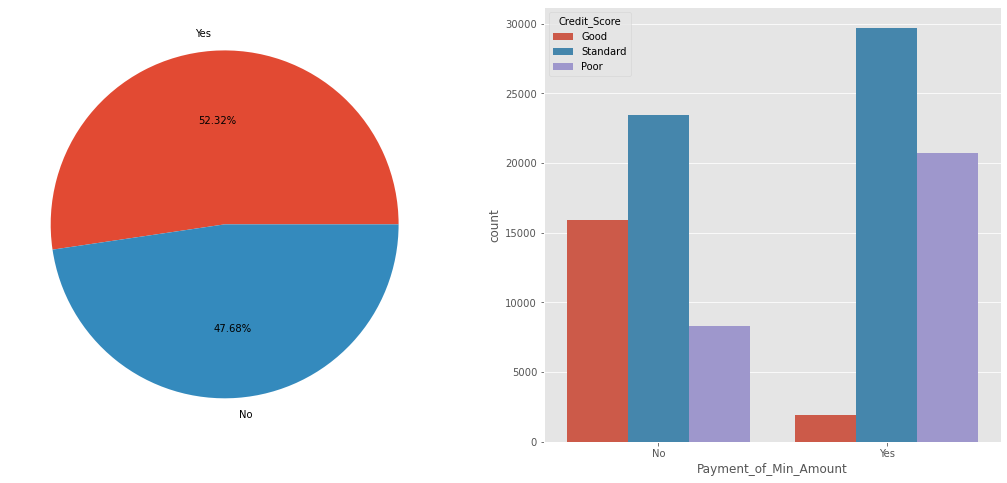

In [ ]:
plt.rcParams['figure.figsize']=[18,8]
index = df.Payment_of_Min_Amount.value_counts().index
values = df.Payment_of_Min_Amount.value_counts().values
plt.subplot(1,2,1)
plt.pie(values,labels=index,autopct='%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x=df.Payment_of_Min_Amount,hue=df.Credit_Score)
plt.show()

##### As we can see that if the customer's payment of minimum amount type is yes that means the customer who has been doing the minimum payment method he/she are most unlikely to have a good credit score.

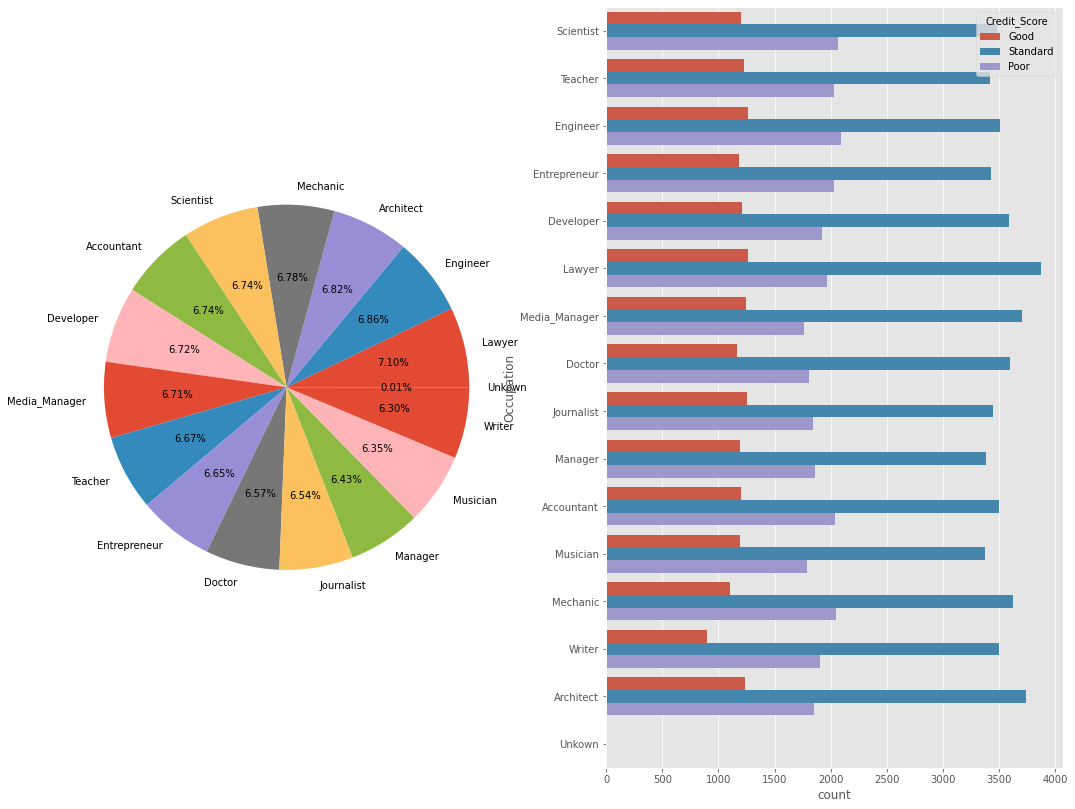

In [ ]:
plt.rcParams['figure.figsize']=[18,14]
index = df.Occupation.value_counts().index
values = df.Occupation.value_counts().values
plt.subplot(1,2,1)
plt.pie(values,labels=index,autopct='%.2f%%')
plt.subplot(1,2,2)
sns.countplot(y=df.Occupation,hue=df.Credit_Score)
plt.show()

#### As we can see we can not take significant information from the above plot concerning our problem statement Since all the occupation seems like affecting the target variables equally.

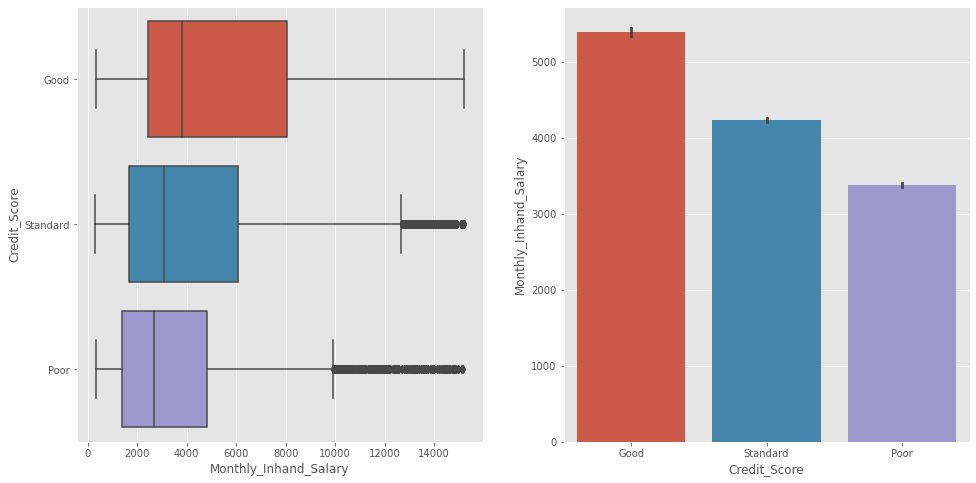

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(df.Monthly_Inhand_Salary,df.Credit_Score)
plt.subplot(1,2,2)
sns.barplot(y=df.Monthly_Inhand_Salary,x=df.Credit_Score)
plt.show()

##### As we can see that the distribution of the Monthly Inhand Salary for the Good class seems like some differ from than other two classes' distribution, Thus we can say that, if the Monthly Inhand Salary is higher than the customer becoming, have good credit score might possible.

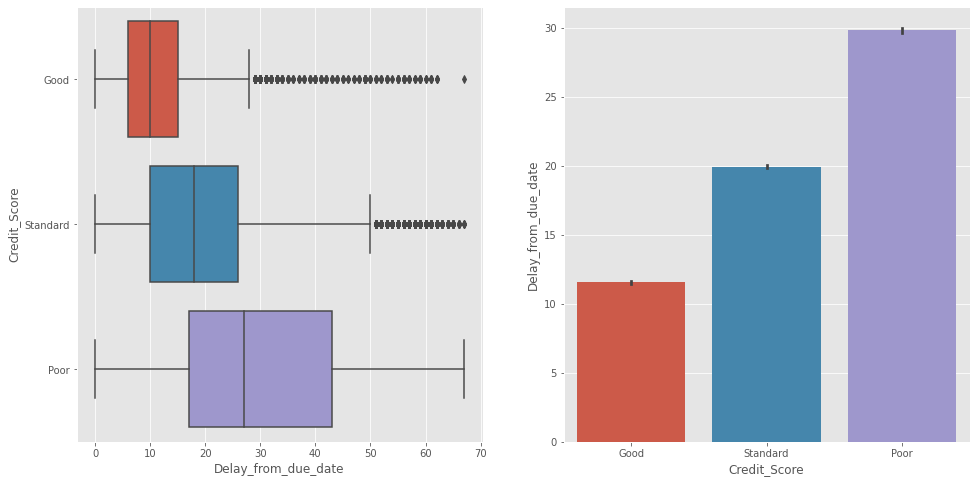

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(df.Delay_from_due_date,df.Credit_Score)
plt.subplot(1,2,2)
sns.barplot(y=df.Delay_from_due_date,x=df.Credit_Score)
plt.show()

##### As we can the Delay of a due date is increasing the customer tends to have a poor credit score. This Delay_from_due_date feature seems significantly affect the target variable classes.

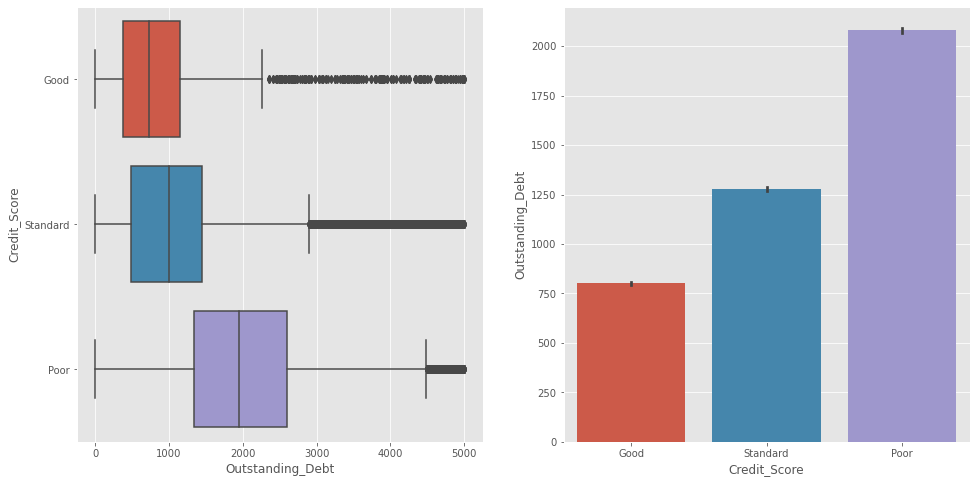

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(df.Outstanding_Debt,df.Credit_Score)
plt.subplot(1,2,2)
sns.barplot(y=df.Outstanding_Debt,x=df.Credit_Score)
plt.show()

##### As we can see from the above box plot that the distribution of the Outstanding Debt is different, So we can see that Outstanding Debt is high for the customer who is having a poor credit score.

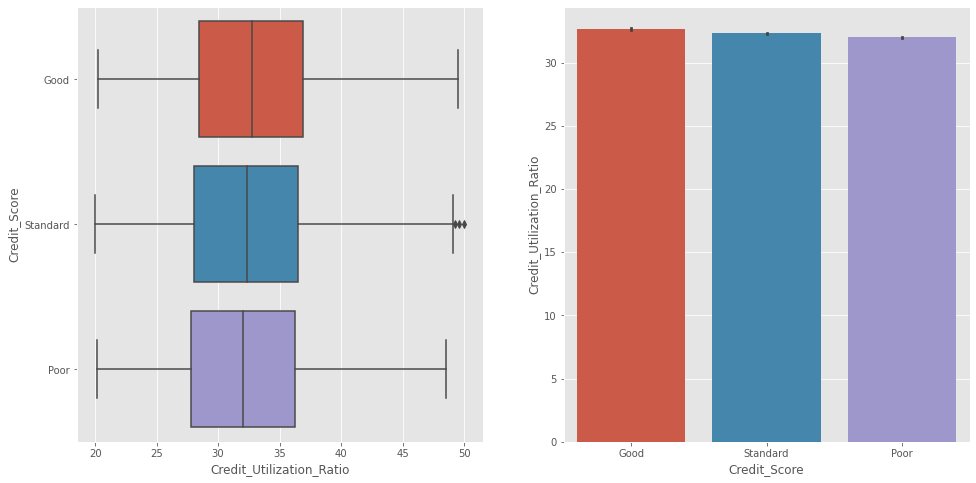

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(df.Credit_Utilization_Ratio,df.Credit_Score)
plt.subplot(1,2,2)
sns.barplot(y=df.Credit_Utilization_Ratio,x=df.Credit_Score)
plt.show()

##### As we can see that is significantly different in the Credit Utilization ratio for all the target classes, Thus we can say that this feature might not be useful in predicting the target variable classes. 

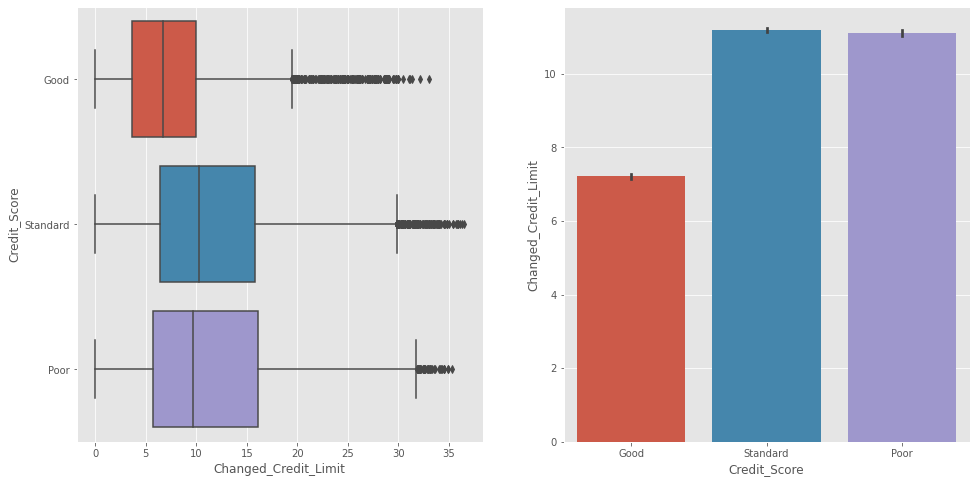

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(df.Changed_Credit_Limit,df.Credit_Score)
plt.subplot(1,2,2)
sns.barplot(y=df.Changed_Credit_Limit,x=df.Credit_Score)
plt.show()

##### As we can see from the above plot that the customer would less likely to change the credit card that belongs to the Good credit score category compared to others. 

### Checking the Age feature distribution for each class of Credit Score.

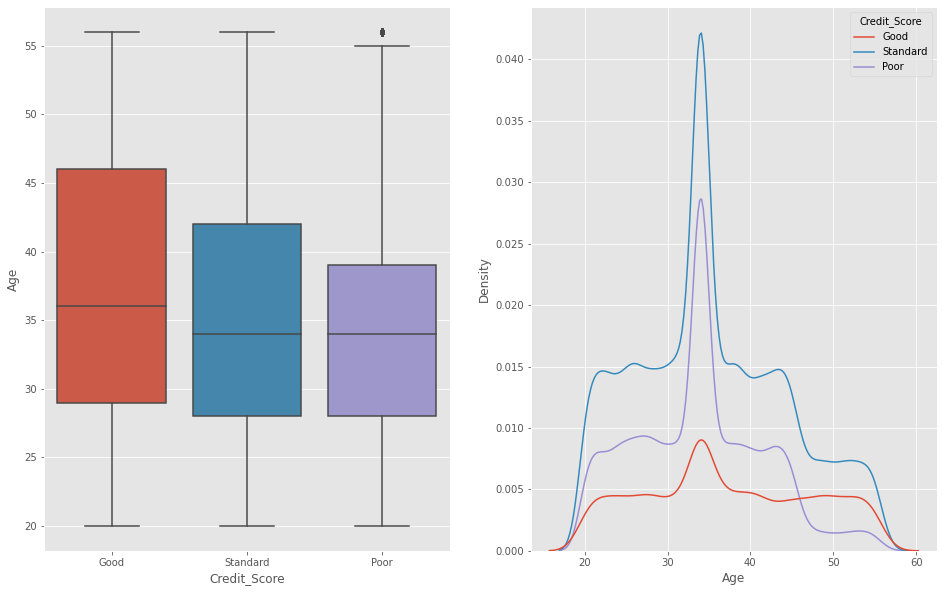

In [ ]:
plt.rcParams['figure.figsize']=[16,10]
plt.subplot(1,2,1)
sns.boxplot(df.Credit_Score,df.Age)
plt.subplot(1,2,2)
sns.kdeplot(df.Age,hue=df.Credit_Score)
plt.show()

#### As we can see that the median value of age across all the classes seems not significantly different.

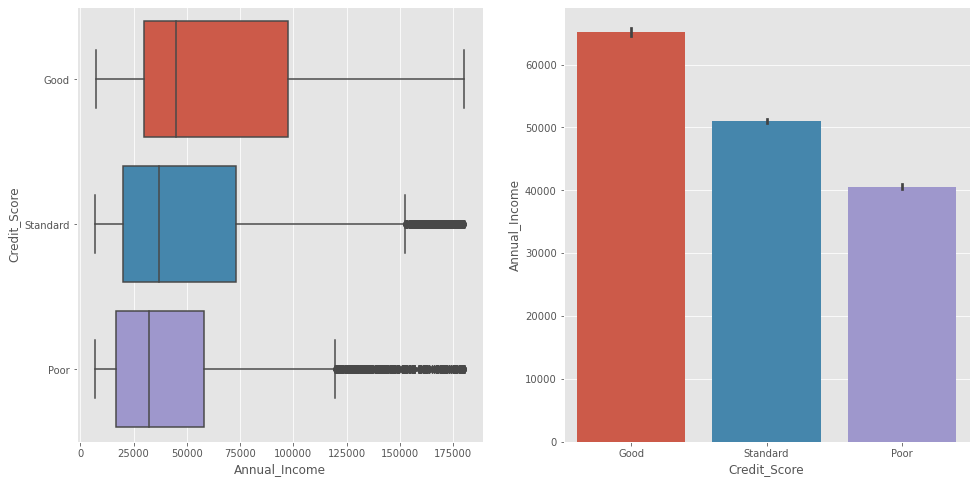

In [ ]:
plt.rcParams['figure.figsize']=[16,8]
plt.subplot(1,2,1)
sns.boxplot(df.Annual_Income,df.Credit_Score)
plt.subplot(1,2,2)
sns.barplot(y=df.Annual_Income,x=df.Credit_Score)
plt.show()

#### As we can see that the Annual income is for the customers who have been into the Good credit score bracket, Which means that there is a possibility that if the person's annual income is high then he or she might have a good credit score.

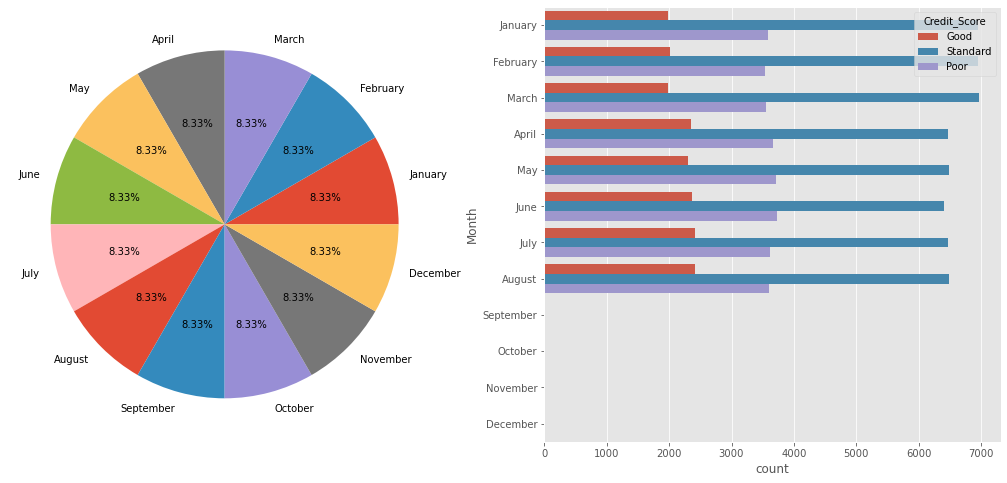

In [ ]:
plt.rcParams['figure.figsize']=[18,8]
index = df.Month.value_counts().index
values = df.Month.value_counts().values
plt.subplot(1,2,1)
plt.pie(values,labels=index,autopct='%.2f%%')
plt.subplot(1,2,2)
sns.countplot(y=df.Month,hue=df.Credit_Score)
plt.show()

#### Pair plot:

In [ ]:
pair_plot = df[['Annual_Income','Age','Changed_Credit_Limit','Outstanding_Debt','Delay_from_due_date','Credit_Score']][:20000]

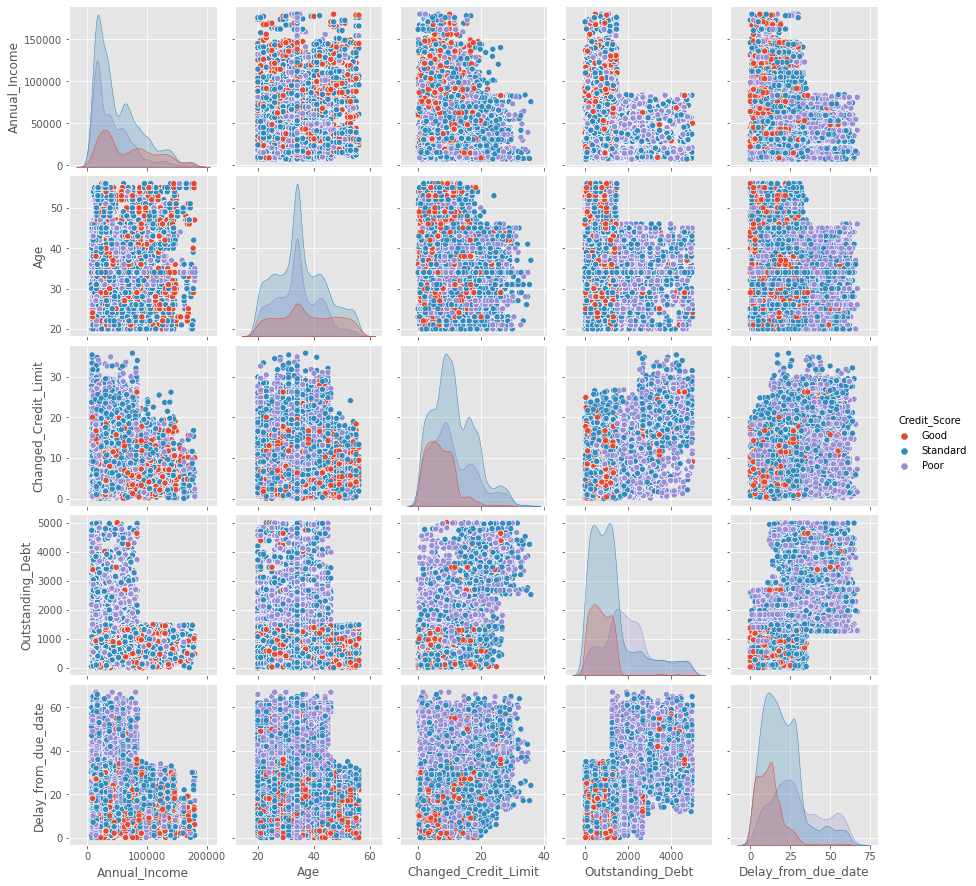

In [ ]:
plt.rcParams['figure.figsize']=[16,12]
sns.pairplot(pair_plot,hue='Credit_Score',diag_kind='kde')

In [ ]:
months = list(df.Month.unique())
months_no = [i for i in range(1,13)]
month = {i:j for i,j in zip(months,months_no)}

In [ ]:
month

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

In [ ]:
df.Month = df.Month.map(month)

### Train and Test split:

In [ ]:
train_data = df.iloc[:train.shape[0],:]
train_data.shape

(100000, 28)

In [ ]:
test_data = df.iloc[train.shape[0]:,:]
test_data.shape

(50000, 28)

In [ ]:
test_data.drop('Credit_Score',axis=1,inplace=True)

### Statistical Analysis:

### Check whether the Annual income across all the target variables is significantly the same. Let's fix alpha is 0.05.

In [ ]:
good = train_data[train_data.Credit_Score == 'Good']
standard = train_data[train_data.Credit_Score == 'Standard']
Poor = train_data[train_data.Credit_Score == 'Poor']

### Checking for normality:

### H0: Data is normally distributed
### H1: Data is not normally distributed

#### As the data is huge we are using the Jarque Bera test instead of the Shapiro test to check the normality of the data.

In [ ]:
print("The Annual income data for Good credit score:",st.jarque_bera(good.Annual_Income))
print("The Annual income data for Standard credit score:",st.jarque_bera(standard.Annual_Income))
print("The Annual income data for Poor credit score:",st.jarque_bera(Poor.Annual_Income))

The Annual income data for Good credit score: Jarque_beraResult(statistic=1843.8116511455528, pvalue=0.0)
The Annual income data for Standard credit score: Jarque_beraResult(statistic=9997.620729888473, pvalue=0.0)
The Annual income data for Poor credit score: Jarque_beraResult(statistic=18687.801275293474, pvalue=0.0)


#### As we can see that the P-value is less than 0.05, Thus we are rejecting the null hypothesis and saying the data is not normally distributed.

#### Levene test:

In [ ]:
print("Checking for equality of variance :",st.levene(good.Annual_Income,standard.Annual_Income,Poor.Annual_Income))

Checking for equality of variance : LeveneResult(statistic=1309.991499367144, pvalue=0.0)


##### As we can see that P-value is 0, Thus the population variance is not equal.

##### As the data is not normally distributed we are using non-parametric tests.

### H0: All the classes median is not significantly different.
### H1: At least one of median is significantly different.

In [ ]:
st.kruskal(good.Annual_Income,standard.Annual_Income,Poor.Annual_Income)

KruskalResult(statistic=4344.371525470604, pvalue=0.0)

### As we can see that the P-value is 0 (less than 0.05) thus we are rejecting the null hypothesis and saying that the parameter(median) of the Annual Income is significantly different at least for one class.

#### Thus we can say that this feature would be impact the target variables.

>>

## Check if there is independence of the Occupation and Credit Score. The significant level is 0.05.

### H0: The Occupation and Credit Score are independent of each other.
### H1: The Occupation and Credit scores are dependent on each other.

In [ ]:
occ_credit = pd.crosstab(train_data.Occupation,df.Credit_Score)
print("The P-value of the chi2 contingency is:",st.chi2_contingency(occ_credit)[1])

The P-value of the chi2 contingency is: 8.248185420633123e-24


#### As we can see that the P-value is less than 0.05 which means that both variables are dependent on each other. So We could use the occupation feature for the Machine learning model. Since the P-value is less than 0.05 we reject the null hypothesis.

>>

## Check if there is a relationship between the Payment Behaviour and Credit Score.

### H0: The Payment Behaviour and Credit Score are independent of each other.
### H1: The Payment Behaviour and Credit scores are dependent on each other.

In [ ]:
pay_credit = pd.crosstab(train_data.Payment_Behaviour,df.Credit_Score)
print("The P-value of the chi2 contingency is:",st.chi2_contingency(pay_credit)[1])

The P-value of the chi2 contingency is: 0.0


>>

## Check Statistically that the Credit_Utilization_Ratio median values are significantly not different across the target variable classes.

### Let's check for the normality of the data.

In [ ]:
print("The Annual income data for Good credit score:",st.jarque_bera(good.Credit_Utilization_Ratio))
print("The Annual income data for Standard credit score:",st.jarque_bera(standard.Credit_Utilization_Ratio))
print("The Annual income data for Poor credit score:",st.jarque_bera(Poor.Credit_Utilization_Ratio))

The Annual income data for Good credit score: Jarque_beraResult(statistic=596.0749337450361, pvalue=0.0)
The Annual income data for Standard credit score: Jarque_beraResult(statistic=1977.349482816871, pvalue=0.0)
The Annual income data for Poor credit score: Jarque_beraResult(statistic=1222.53560464982, pvalue=0.0)


#### We can see that P-value is 0 Thus we reject the null hypothesis, So the data is not normally distributed.

### Levene test:

In [ ]:
print("Checking for equality of variance :",st.levene(good.Credit_Utilization_Ratio,standard.Credit_Utilization_Ratio,Poor.Credit_Utilization_Ratio))

Checking for equality of variance : LeveneResult(statistic=8.408643691373916, pvalue=0.0002230896840749341)


##### As we can see that P-value is less than 0.05, Thus the population variance is not equal.

### H0: All the classes median is not significantly different.
### H1: At least one of median is significantly different.

In [ ]:
st.kruskal(good.Credit_Utilization_Ratio,standard.Credit_Utilization_Ratio,Poor.Credit_Utilization_Ratio)

KruskalResult(statistic=179.44399399321992, pvalue=1.082011306670754e-39)

### As we can see that the P-value is less than 0.05, Thus we reject the null hypothesis and state that the parameter(median) of at least one class is significantly different. 

### Feature Engineering:

In [ ]:
train_data.Occupation.unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect',
       'Unkown'], dtype=object)

In [ ]:
group1 = ['Media_Manager','Musician','Writer']
group2 = ['Scientist','Developer','Architect','Doctor']
group3 = ['Manager','Teacher','Lawyer','Journalist','Accountant','Mechanic','Engineer']
group4 = ['Entrepreneur']

In [ ]:
train_data.Occupation = train_data.Occupation.apply(lambda x:'group1' if x in group1 else 'group2' if x in group2 else 'group3' if x in group3 else 'group4' if x in group4 else x)
test_data.Occupation = test_data.Occupation.apply(lambda x:'group1' if x in group1 else 'group2' if x in group2 else 'group3' if x in group3 else 'group4' if x in group4 else x)

In [ ]:
auto_loan = train_data[train_data.Type_of_Loan.str.contains('Auto Loan')]['Type_of_Loan'].unique()

In [ ]:
credit_builder_loan = train_data[(train_data.Type_of_Loan.str.contains('Credit-Builder Loan')) &(~(train_data.Type_of_Loan.str.contains('Auto Loan')))]['Type_of_Loan'].unique()

In [ ]:
train_data.Type_of_Loan = train_data.Type_of_Loan.apply(lambda x: 'type1' if x in auto_loan else 'type2' if x in credit_builder_loan else 'type3')
test_data.Type_of_Loan = test_data.Type_of_Loan.apply(lambda x: 'type1' if x in auto_loan else 'type2' if x in credit_builder_loan else 'type3')

In [ ]:
train_data.describe(include='object')

,ID,Customer_ID,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,12500,10139,5,3,3,2,6,3
top,0x1602,CUS_0xd40,Langep,group3,type3,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,1,8,48,47120,49416,45848,52326,36041,53174


### Split the independent and dependent data.

In [ ]:
y = train_data.Credit_Score
X = train_data.drop('Credit_Score',axis =1)

In [ ]:
y.value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
y = y.replace({'Poor':0,'Standard':1,'Good':2})

In [ ]:
validate_data = test_data.copy()

### Dummy encoding the Categorical variables:

In [ ]:
cat_features = X.select_dtypes('object')
cat_names = X.select_dtypes('object').columns
cat_features.drop(['ID','Customer_ID','Name'],axis = 1,inplace=True)

In [ ]:
num_features = X.select_dtypes('number')
num_names = X.select_dtypes('number').columns

##### for validate data:

In [ ]:
cat_features_validate = validate_data.select_dtypes('object')
cat_features_validate.drop(['ID','Customer_ID','Name'],axis = 1,inplace=True)
num_features_validate = validate_data.select_dtypes('number')

### Get dummies for actual data and for validate data:

In [ ]:
cat_features_dummies = pd.get_dummies(cat_features,drop_first=True)

In [ ]:
cat_features_dummies_validate = pd.get_dummies(cat_features_validate,drop_first=True)

#### Let's scale the features:

In [ ]:
MM_scaler = MinMaxScaler()
STD_scaler = StandardScaler()

In [ ]:
num_features_scaled = pd.DataFrame(MM_scaler.fit_transform(num_features),columns=num_features.columns)
num_features_scaled_validate = pd.DataFrame(MM_scaler.fit_transform(num_features_validate),columns=num_features_validate.columns)

### Concat the Dummies variables and scalled variables:

In [ ]:
num_features_scaled.reset_index(drop=True,inplace=True)
cat_features_dummies.reset_index(drop=True,inplace=True)
X = pd.concat([num_features_scaled,cat_features_dummies],axis=1)

In [ ]:
num_features_scaled_validate.reset_index(drop=True,inplace=True)
cat_features_dummies_validate.reset_index(drop=True,inplace=True)
validate_data1 = pd.concat([num_features_scaled_validate,cat_features_dummies_validate],axis=1)

#### Train and Test split:

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1999)

#### Create functions to store the scores and evaluate the model.

In [ ]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model Name', 'f1-micro',
                                       'f1-macro', 'f1-weighted'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Recall Score','Accuracy Score',
# 'Kappa Score','f1-score' and roc auc score
# compile the required information in a user defined function 
def update_score_card(model_name,model,X_test,y_test):
    from sklearn import metrics
    
    # let 'y_pred' be the predicted values of y
    y_pred = model.predict(X_test)
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model Name':model_name,
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'f1-micro':metrics.f1_score(y_test,y_pred,average='micro'),
                                    'f1-macro':metrics.f1_score(y_test,y_pred,average='macro'),
                                    'f1-weighted':metrics.f1_score(y_test,y_pred,average='weighted')}, 
                                    ignore_index = True)
    return score_card

In [ ]:
def Classification_report_method(model,X_train,y_train,X_test,y_test):
    # model get predicted value for y_train
    y_train_pred = model.predict(X_train)
    
    # model get predicted value for y_train
    y_test_pred = model.predict(X_test)
    print('Classification Report for Train Data:')
    # classification report
    print(classification_report(y_train,y_train_pred))
    print()
    print('Classification Report for Test Data:')
    # classification report
    print(classification_report(y_test,y_test_pred))

### Base Model Building:

In [ ]:
MNB = MultinomialNB().fit(X_train,y_train)

In [ ]:
Classification_report_method(MNB,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.57      0.34      0.43     23161
           1       0.68      0.67      0.67     42614
           2       0.49      0.83      0.62     14225

    accuracy                           0.60     80000
   macro avg       0.58      0.61      0.57     80000
weighted avg       0.61      0.60      0.59     80000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.56      0.33      0.41      5837
           1       0.67      0.66      0.66     10560
           2       0.49      0.83      0.62      3603

    accuracy                           0.59     20000
   macro avg       0.57      0.61      0.56     20000
weighted avg       0.60      0.59      0.58     20000



In [ ]:
update_score_card("Multi Nomial Naive Bayes",MNB,X_test,y_test)

,Model Name,f1-micro,f1-macro,f1-weighted,Accuracy Score
0,Multi Nomial Naive Bayes,0.5947,0.56478729,0.58276106,0.5947


>>>

#### KNN model

In [ ]:
KNN_model = KNeighborsClassifier().fit(X_train,y_train)

In [ ]:
Classification_report_method(KNN_model,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75     23161
           1       0.80      0.83      0.82     42614
           2       0.75      0.66      0.70     14225

    accuracy                           0.78     80000
   macro avg       0.77      0.75      0.76     80000
weighted avg       0.78      0.78      0.78     80000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      5837
           1       0.70      0.74      0.72     10560
           2       0.58      0.51      0.55      3603

    accuracy                           0.66     20000
   macro avg       0.64      0.62      0.63     20000
weighted avg       0.66      0.66      0.66     20000



In [ ]:
update_score_card("KNeighborsClassifier",KNN_model,X_test,y_test)

,Model Name,f1-micro,f1-macro,f1-weighted,Accuracy Score
0,Multi Nomial Naive Bayes,0.5947,0.56478729,0.58276106,0.59470
1,KNeighborsClassifier,0.66105,0.62808948,0.65875395,0.66105


>>>

In [ ]:
RF_model = RandomForestClassifier().fit(X_train,y_train)

In [ ]:
Classification_report_method(RF_model,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23161
           1       1.00      1.00      1.00     42614
           2       1.00      1.00      1.00     14225

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      5837
           1       0.84      0.83      0.84     10560
           2       0.80      0.79      0.79      3603

    accuracy                           0.83     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000



In [ ]:
update_score_card("Random Forest Classifier",RF_model,X_test,y_test)

,Model Name,f1-micro,f1-macro,f1-weighted,Accuracy Score
0,Multi Nomial Naive Bayes,0.5947,0.56478729,0.58276106,0.59470
1,KNeighborsClassifier,0.66105,0.62808948,0.65875395,0.66105
2,Random Forest Classifier,0.82585,0.81901405,0.82587659,0.82585


>>>

In [ ]:
XGB_model = XGBClassifier().fit(X_train,y_train)

In [ ]:
Classification_report_method(XGB_model,X_train,y_train,X_test,y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     23161
           1       0.85      0.84      0.84     42614
           2       0.77      0.82      0.79     14225

    accuracy                           0.82     80000
   macro avg       0.81      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      5837
           1       0.79      0.79      0.79     10560
           2       0.69      0.73      0.71      3603

    accuracy                           0.76     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.76      0.76      0.76     20000



In [ ]:
update_score_card("XGBoost Classifier",XGB_model,X_test,y_test)

,Model Name,f1-micro,f1-macro,f1-weighted,Accuracy Score
0,Multi Nomial Naive Bayes,0.5947,0.56478729,0.58276106,0.59470
1,KNeighborsClassifier,0.66105,0.62808948,0.65875395,0.66105
2,Random Forest Classifier,0.82585,0.81901405,0.82587659,0.82585
3,XGBoost Classifier,0.7634,0.75030246,0.76365091,0.76340


>>>

### Feature Selection:

In [ ]:
Feat_imp = pd.DataFrame({"Importance":RF_model.feature_importances_,"Features":X_train.columns})
Feat_imp.sort_values(by='Importance',ascending=False,inplace=True)

In [ ]:
features = Feat_imp.Features.head(15)

In [ ]:
RF_model1 = RandomForestClassifier().fit(X_train[features],y_train)

In [ ]:
Classification_report_method(RF_model1,X_train[features],y_train,X_test[features],y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23161
           1       1.00      1.00      1.00     42614
           2       1.00      1.00      1.00     14225

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      5837
           1       0.84      0.82      0.83     10560
           2       0.79      0.79      0.79      3603

    accuracy                           0.82     20000
   macro avg       0.81      0.82      0.82     20000
weighted avg       0.82      0.82      0.82     20000



In [ ]:
update_score_card("Random Forest with Feature Importance",RF_model1,X_test[features],y_test)

,Model Name,f1-micro,f1-macro,f1-weighted,Accuracy Score
0,Multi Nomial Naive Bayes,0.5947,0.56478729,0.58276106,0.59470
1,KNeighborsClassifier,0.66105,0.62808948,0.65875395,0.66105
2,Random Forest Classifier,0.82585,0.81901405,0.82587659,0.82585
3,XGBoost Classifier,0.7634,0.75030246,0.76365091,0.76340
4,Random Forest with Feature Importance,0.82255,0.81536197,0.82263557,0.82255


### Feature Selection:

In [ ]:
RFE_model = RFE(RandomForestClassifier(),n_features_to_select=15,verbose=2).fit(X_train,y_train)

Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


In [ ]:
RFE_model.score(X_test,y_test)

0.8187

In [ ]:
RFE_df = pd.DataFrame({"Rank":RFE_model.ranking_,"Features":X_train.columns})
rfe_feature = RFE_df[RFE_df.Rank ==1]['Features']

In [ ]:
RF_model_rfe = RandomForestClassifier().fit(X_train[rfe_feature],y_train)

In [ ]:
Classification_report_method(RF_model_rfe,X_train[rfe_feature],y_train,X_test[rfe_feature],y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23161
           1       1.00      1.00      1.00     42614
           2       1.00      1.00      1.00     14225

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      5837
           1       0.85      0.82      0.83     10560
           2       0.77      0.80      0.78      3603

    accuracy                           0.82     20000
   macro avg       0.81      0.82      0.81     20000
weighted avg       0.82      0.82      0.82     20000



In [ ]:
update_score_card("Random Forest with RFE Feature Importance",RF_model_rfe,X_test[rfe_feature],y_test)

,Model Name,f1-micro,f1-macro,f1-weighted,Accuracy Score
0,Multi Nomial Naive Bayes,0.5947,0.56478729,0.58276106,0.59470
1,KNeighborsClassifier,0.66105,0.62808948,0.65875395,0.66105
2,Random Forest Classifier,0.82585,0.81901405,0.82587659,0.82585
3,XGBoost Classifier,0.7634,0.75030246,0.76365091,0.76340
4,Random Forest with Feature Importance,0.82255,0.81536197,0.82263557,0.82255
5,Random Forest with RFE Feature Importance,0.81825,0.81042422,0.81849205,0.81825


>>>

### Grid Search CV - Model Tuning:

In [ ]:
params = [{'n_estimators':[105,112,115,120,125],
           'max_depth':[4,5,6,7],
           'max_features':['sqrt','log2'],'min_samples_leaf':[1,2,3,4],'ccp_alpha':[0,0.1,0.2,0.4],
           'n_jobs':[-1]}]

In [ ]:
RCV_model = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params,cv=5,n_jobs=-1).fit(X_train[rfe_feature],y_train)

In [ ]:
RCV_model.best_params_

{'n_jobs': -1,
 'n_estimators': 112,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 6,
 'ccp_alpha': 0}

In [ ]:
RCV_model.score(X_train[rfe_feature],y_train)

0.7025375

In [ ]:
Final_model = RandomForestClassifier(n_estimators=112,min_samples_leaf=2,max_features='log2',max_depth=6,n_jobs=-1)
Final_model.fit(X_train[rfe_feature],y_train)

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=2,
                       n_estimators=112, n_jobs=-1)

In [ ]:
Classification_report_method(Final_model,X_train[rfe_feature],y_train,X_test[rfe_feature],y_test)

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69     23161
           1       0.80      0.69      0.74     42614
           2       0.51      0.83      0.63     14225

    accuracy                           0.70     80000
   macro avg       0.68      0.72      0.69     80000
weighted avg       0.73      0.70      0.71     80000


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      5837
           1       0.79      0.68      0.73     10560
           2       0.51      0.83      0.63      3603

    accuracy                           0.69     20000
   macro avg       0.68      0.72      0.68     20000
weighted avg       0.72      0.69      0.70     20000



In [ ]:
update_score_card("Final Model",Final_model,X_test[rfe_feature],y_test)

,Model Name,f1-micro,f1-macro,f1-weighted,Accuracy Score
0,Multi Nomial Naive Bayes,0.5947,0.56478729,0.58276106,0.59470
1,KNeighborsClassifier,0.66105,0.62808948,0.65875395,0.66105
2,Random Forest Classifier,0.82585,0.81901405,0.82587659,0.82585
3,XGBoost Classifier,0.7634,0.75030246,0.76365091,0.76340
4,Random Forest with Feature Importance,0.82255,0.81536197,0.82263557,0.82255
5,Random Forest with RFE Feature Importance,0.81825,0.81042422,0.81849205,0.81825
6,Final Model,0.6944,0.68166557,0.69906824,0.69440


## Cross Validation Score:

In [ ]:
cross_valiadtion = cross_val_score(estimator=RandomForestClassifier(n_estimators=112,min_samples_leaf=2,max_features='log2',max_depth=6,n_jobs=-1),X=X[rfe_feature],y=y,cv=5,n_jobs=-1)

In [ ]:
print('The score:',cross_valiadtion)
print('The mean score',np.mean(cross_valiadtion))

The score: [0.6856  0.6919  0.70255 0.68615 0.70545]
The mean score 0.69433


## Validation of the model:

In [ ]:
Final_model1 = RandomForestClassifier(n_estimators=112,min_samples_leaf=2,max_features='log2',max_depth=6,n_jobs=-1)
Final_model1.fit(X[rfe_feature],y)

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=2,
                       n_estimators=112, n_jobs=-1)

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = Final_model1.predict(X[rfe_feature])

In [ ]:
y_pred_validation = Final_model1.predict(validate_data1[rfe_feature])

In [ ]:
print('The classfication report of the data')
print(classification_report(y,y_pred))

The classfication report of the data
              precision    recall  f1-score   support

           0       0.74      0.64      0.69     28998
           1       0.79      0.69      0.74     53174
           2       0.51      0.83      0.63     17828

    accuracy                           0.70    100000
   macro avg       0.68      0.72      0.69    100000
weighted avg       0.73      0.70      0.70    100000



In [ ]:
predicted_df = pd.DataFrame({'ID':np.array(validate_data.ID),'Predicted_values':y_pred_validation})

In [ ]:
predicted_df.to_csv('Sample_Output.csv')

## Summary:

As we can see that models like the KNN classifier and Radom Forest have been overfitted initially. Therefore I tried with XGBOOST Model since it was under fitted model compared to the Random Forest and was taking a long time to train the model. We decided to tune the Random Forest model to find the best parameters for the model, Then we could see that we could control the overfitting of the Random Forest of the model and We found the best feature for the models using the Feature Selection method namely the Recursive Feature Selection method. Then We rebuilt the Random Forest model and were able to get nearly the same results as before the model. The Cross-Validation Score method showed the model's real performance.  


We have been presuming that the Random Forest has the capability of taking the different random features and sample records to train each tree due to these factors, The model was able to identify the pattern of the data by taking random samples (The random sample might have come from outliers data and normal data). Therefore these factors would have been one possibility that the model was able to train faster compared to XGBOOST(ensemble) models.

We have seen that the EDA and Statistical analysis would help us to understand the pattern of the factors(independent variables) that affect the dependent variables. We also understood that a few numerical Features have overlapped across the target variables classes. Therefore We would eliminate those features by using feature selection methods and still were able to get nearly the same results. The different feature engineering methods, Feature Extraction(creation), and Feature selection methods would help the model in identifying the patterns. Keep exploring more on the datasets!